# Хеш-функции

## СОЗДАНИЕ ДЕРЕВЬЕВ

In [1]:
class MyNode:
    
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right

In [2]:
# %pip install binarytree

In [3]:
from binarytree import tree, bst, Node, build

#### создаём неполное дерево высотой 4

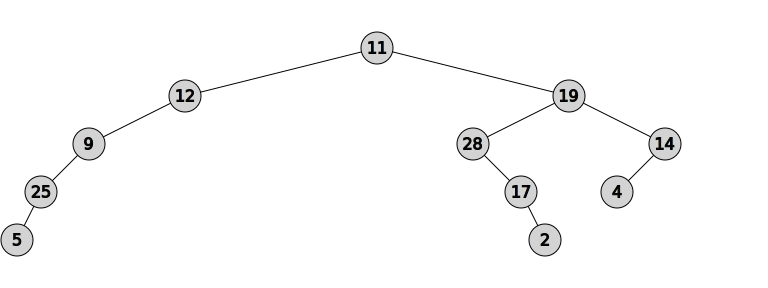

In [4]:
a = tree(height=4, is_perfect=False)
a

листья находятся не разной высоте, числа разбросаны как попало - нет порядка бинарного поискового дерева

#### создаём бинарное дерево поиска

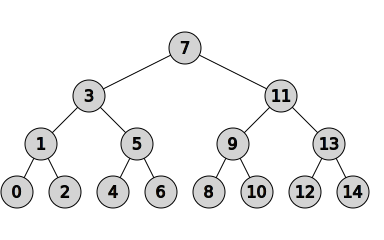

In [5]:
b = bst(height=3, is_perfect=True)
b

листья на одной высоте, числа упорядочены

#### создадим такое же дерево, но вручную

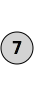

In [6]:
c = Node(7) 
c

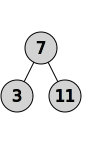

In [7]:
c.left = Node(3)
c.right = Node(11)
c

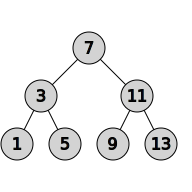

In [8]:
c.left.left = Node(1)
c.left.right = Node(5)
c.right.left = Node(9)
c.right.right = Node(13)
c

#### создадим дерево с помощью функции build

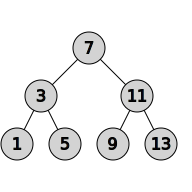

In [9]:
d = build([7, 3, 11, 1, 5, 9, 13])
d

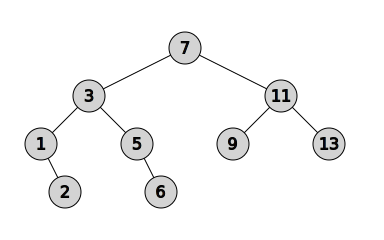

In [10]:
d = build([7, 3, 11, 1, 5, 9, 13, None, 2, None, 6])
d

## БИНАРНЫЙ ПОИСК

In [11]:
from binarytree import bst

In [12]:
def search(bin_search_tree, number, path=''):
    
    if bin_search_tree.value == number:
        return f'Число {number} обнаружено по следующему пути: \nКорень {path}'
    
    if number < bin_search_tree.value and bin_search_tree.left != None:
        return search(bin_search_tree.left, number, path=f'{path}\nШаг влево')
            
    if number > bin_search_tree.value and bin_search_tree.right != None:
        return search(bin_search_tree.right, number, path=f'{path}\nШаг вправо')
    
    return f'Число {number} отсутствует в дереве'



In [13]:
bt = bst(height=5, is_perfect=False)
print(bt)
num = int(input('Введите число для поиска: '))
print(search(bt, num))


      _________________________________46________________________
     /                                                           \
  __2__________________                                    _______55____________
 /                     \                                  /                     \
0             __________40_________               _______52___         __________61
 \           /                     \             /            \       /            \
  1       __11___               ____45      ____49            _54    56___          62
         /       \             /           /      \          /            \
        5        _14         _42          47       50       53            _59
       / \      /   \       /   \           \        \                   /   \
      3   6    13    29    41    44          48       51                58    60

Введите число для поиска: 0
Число 0 обнаружено по следующему пути: 
Корень 
Шаг влево
Шаг влево


## ХЭШ-ФУНКЦИЯ

In [14]:
h_list = [None] * 26

def my_append(value):
    index = ord(value[0]) - ord('a')
    print(index)
    h_list[index] = value
    print(h_list)
    

a = 'apricot'
my_append(a)

b = 'banana'
my_append(b)

c = 'apple'
my_append(c)

0
['apricot', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
1
['apricot', 'banana', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
0
['apple', 'banana', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]


In [15]:
print(4235 == 4 * 10 ** 3 + 2 * 10 ** 2 + 3 * 10 ** 1 + 5 * 10 ** 0)

True


пример демонстрирует достоинства позиционной системы счисления

In [16]:
def my_index(value):
    letter = 26
    index = 0
    
    for i, char in enumerate(value):
        index += (ord(char) - ord('a') + 1) * letter ** i
        
    print(index)


a = 'apricot'
my_index(a)

b = 'banana'
my_index(b)

c = 'apple'
my_index(c)

6358077857
18306108
2507025


тем не менее, значения хэша велики!

улучшим ситуацию

In [17]:
def my_index(value):
    letter = 26
    index = 0
    size = 10000
    
    for i, char in enumerate(value):
        index += (ord(char) - ord('a') + 1) * letter ** i
        
    print(index % 10000)  # остаток от деления индекса на размер size


a = 'apricot'
my_index(a)

b = 'banana'
my_index(b)

c = 'apple'
my_index(c)

7857
6108
7025


## ИСПОЛЬЗОВАНИЕ ХЭШ-ФУНКЦИЙ ДЛЯ ПОДПИСИ СООБЩЕНИЙ

In [18]:
import hashlib


print(hashlib.sha1(b'Hello World!'))  # функция хэширования sha1 возвращает hash-объект
print(hashlib.sha1(b'Hello World!').hexdigest())  # отобразим этот hash-объект в виде 16-ричного числа

<sha1 HASH object @ 0x00000255B6E837F0>
2ef7bde608ce5404e97d5f042f95f89f1c232871


идея хэш-функции заключается в том, что она работает только в одном направлении - её легко подсчитать для любой исходной информации, но найти документ по значению хэш-функции практически невозможно

если изменить хотя бы одну букву в сообщении, то её хэш-функция изменится полностью:

In [19]:
print(hashlib.sha1(b'Hello World?').hexdigest())

19b2e855874fda4939883fbde1714a77c3bbf0b8


НО, злоумышленник может перехватить сообщение и хэш и подменить их!

для повышения устойчивости механизма аутентификации с использованием хэш-функции используют секретное слово:

In [20]:
print(hashlib.sha1(b'sekretnoe slovo' + b'Hello World?').hexdigest()) 

be02464171015dcb2bfa39ee1d6a9b62232a4698


НО, злоумышленник может перехватить сообщение, поменять его и добавить к хэшу (дописать символов) до получения необходимого значения!

чтобы такого не было, переведём хэш письма в формат utf-8, допишем к нему секретное слово и подсчитает уже хэш на хэш + секретное слово

In [21]:
s = hashlib.sha1(b'Hello World?').hexdigest()

print(s.encode('utf-8'))

print(hashlib.sha1(b'sekretnoe slovo' + bytes(s.encode('utf-8'))).hexdigest()) 

b'19b2e855874fda4939883fbde1714a77c3bbf0b8'
bb28619a6f23040ad693a79e57e395c478dbea95


## SECURE HASH ALGORYTHM 1 (SHA-1)

программа не рабочая - это алгоритм в python-стиле!!!

## СРАВНЕНИЕ СТРОК С ПОМОЩЬЮ ХЭШИРОВАНИЯ

In [31]:
import hashlib


def whether_the_strings_are_equal(string_1: str, string_2: str, verbose=False) -> bool:
    
    assert len(a) > 0 and len(b) > 0, 'строки не могут быть пустые'
    
    hash_string_1 = hashlib.sha1(string_1.encode('utf-8')).hexdigest()
    hash_string_2 = hashlib.sha1(string_2.encode('utf-8')).hexdigest()
    
    if verbose:
        print(f'hash_string_1 = {hash_string_1}\nhash_string_2 = {hash_string_2}\n')
    
    return hash_string_1 == hash_string_2



In [35]:
string_1 = 'here is a string'
string_2 = 'here is a string'

print('строки одинаковые' if whether_the_strings_are_equal(string_1, string_2, True) else 'строки разные')

hash_string_1 = ece1b591a648322e316d149dbfb2c6e073aec26f
hash_string_2 = ece1b591a648322e316d149dbfb2c6e073aec26f

строки одинаковые


## ПОИСК ПОДСТРОКИ В СТРОКЕ, АЛГОРИТМ РАБИНА-КАРПА

In [36]:
import hashlib


def rabin_karp(string: str, substring: str) -> int:
    # функция будет возвращать индекс элемента с которого начинается подстрока в стороке,
    # если подстрока отсутствует, то будет возвращаться -1
    
    assert len(string) > 0 and len(substring) > 0, 'строки не могут быть пустые'
    assert len(string) >= len(substring) , 'подстрока не может быть длиннее строки'
    
    len_substring = len(substring)
    hash_substring = hashlib.sha1(substring.encode('utf-8')).hexdigest()
    
    for i in range(len(string) - len_substring + 1):
        if hash_substring == hashlib.sha1(string[i:i + len_substring].encode('utf-8')).hexdigest():
            if string[i:i + len_substring] == substring:
                return i
    
    return -1

In [39]:
string = 'hey, here is a string!'
substring = 'here is'

position = rabin_karp(string, substring)  

print(f'подстрока найдена в позиции {position}' if position != -1 else 'подстрока не найдена')

подстрока найдена в позиции 5
